<a href="https://colab.research.google.com/github/mamatgeol/Kelompok-3-PMML/blob/main/IndoVADER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00


In [20]:
# ============================================================
# 1. IMPORT DATASET (.TXT)
# ============================================================

import pandas as pd

file_path = "tweets_DigitalisasiPembelajaran.txt"

tweets = []
with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        if line.startswith("Text:"):
            tweets.append(line.replace("Text:", "").strip())

df = pd.DataFrame({"tweet": tweets})
df.head()


,tweet
0,10 org pertama yang daftar dan main di #bagus3...
1,semangat belajar siswa makin tumbuh karena fas...
2,@Henik_yuli program #DigitalisasiPembelajaran ...
3,ikut nyimak rangkaian programnya dan kerasa ba...
4,"@textcicicuit dulu zaman kita sekolah, paling ..."


In [21]:
# Sentimen IndoVADER
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", "", text)
    return text.strip()

df["clean_text"] = df["tweet"].apply(clean_text)
df.head()


,tweet,clean_text
0,10 org pertama yang daftar dan main di #bagus3...,org pertama yang daftar dan main di free join...
1,semangat belajar siswa makin tumbuh karena fas...,semangat belajar siswa makin tumbuh karena fas...
2,@Henik_yuli program #DigitalisasiPembelajaran ...,program cocok banget untuk generasi indonesia...
3,ikut nyimak rangkaian programnya dan kerasa ba...,ikut nyimak rangkaian programnya dan kerasa ba...
4,"@textcicicuit dulu zaman kita sekolah, paling ...",dulu zaman kita sekolah paling canggih overhea...


In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    compound = score["compound"]
    if compound > 0:
        return "positif"
    elif compound < 0:
        return "negatif"
    else:
        return "netral"

df["label"] = df["clean_text"].apply(vader_sentiment)
df.head()

,tweet,clean_text,label
0,10 org pertama yang daftar dan main di #bagus3...,org pertama yang daftar dan main di free join...,positif
1,semangat belajar siswa makin tumbuh karena fas...,semangat belajar siswa makin tumbuh karena fas...,netral
2,@Henik_yuli program #DigitalisasiPembelajaran ...,program cocok banget untuk generasi indonesia...,netral
3,ikut nyimak rangkaian programnya dan kerasa ba...,ikut nyimak rangkaian programnya dan kerasa ba...,netral
4,"@textcicicuit dulu zaman kita sekolah, paling ...",dulu zaman kita sekolah paling canggih overhea...,positif


In [23]:
sent_count = df["label"].value_counts()
print(sent_count)

label
netral     91
positif     9
Name: count, dtype: int64


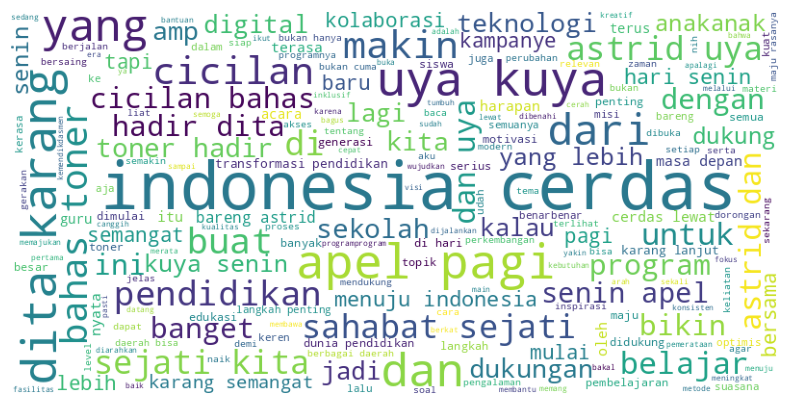

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = " ".join(df["clean_text"])
wc = WordCloud(background_color="white", width=800, height=400).generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()


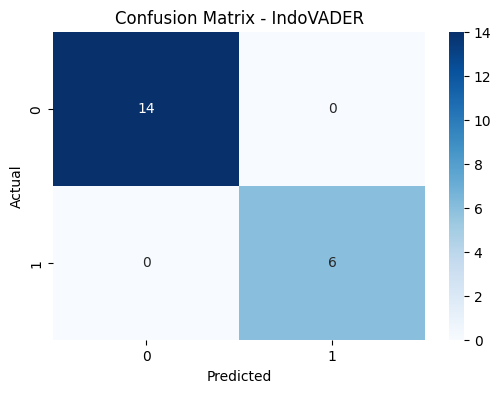

              precision    recall  f1-score   support

      netral       1.00      1.00      1.00        14
     positif       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [25]:
# Evaluasi IndoVADER dengan Train-Test
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# misalkan clean_text dijadikan fitur TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["clean_text"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

y_pred = df.loc[y_test.index, "label"]  # karena label dari VADER sudah ada

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - IndoVADER")
plt.show()

print(classification_report(y_test, y_pred))

In [26]:
print("=== Rangkuman Sentimen ===")
print("Total Data :", len(df))
print("Positif :", sent_count.get("positif", 0))
print("Negatif :", sent_count.get("negatif", 0))
print("Netral  :", sent_count.get("netral", 0))


=== Rangkuman Sentimen ===
Total Data : 100
Positif : 9
Negatif : 0
Netral  : 91
